<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt


### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
# comando bache

!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: A granularidade de Energia esta em meses !.
 - Qual é o intervalo de tempo (min/max): Os dados disponiveis inicia em janeiro de 2004 a dezembro de 2020.

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [6]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [7]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [9]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: A granularidade de Energia esta em Dias!.
 - Qual é o intervalo de tempo (min/max): Os dados disponiveis inicia em dia
  15 Julho de 2018 a dia 31 dezembro de 2020.

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [10]:
# resposta da questão 2.1.a
energia = energia.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [57]:
# resposta da questão 2.1.b
energia['ano'] = energia.index.year

energia_ano = energia['2019':'2020']

energia_ano.tail()

,residencial,industrial,comercial,ano
referencia,,,,
2020-08-01,5671487,7697947,3198269,2020
2020-09-01,5756787,7723167,3431649,2020
2020-10-01,6241392,8042503,3890202,2020
2020-11-01,5999235,7878699,3718647,2020
2020-12-01,6377972,7832769,3965809,2020


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [12]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])

In [13]:
temperatura.head(n=1)

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [14]:
# resposta da questão 2.1.b
temperatura['ano'] = temperatura.index.year

temperatura_ano = temperatura['2019':'2020']

temperatura_ano.shape

(731, 4)

In [15]:
temperatura_ano.head()

,temp-media-sp,temp-media-rj,temp-media-mg,ano
referencia,,,,
2019-01-01,22,28.0,21.0,2019
2019-01-02,25,28.0,24.0,2019
2019-01-03,26,31.0,24.0,2019
2019-01-04,23,31.0,22.0,2019
2019-01-05,21,28.0,23.0,2019


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [16]:
# resposta da questão 2.2.c
temperatura_ano.dropna()


# foi preciso descarta a coluna ano para não afeta a medeia no resamplede
temperatura_ano = temperatura_ano.drop(['ano'], axis=1)


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [17]:
# resposta da questão 2.2.d

temperatura_ano['temp-media'] = temperatura_ano.mean(axis=1)

In [54]:
temperatura_ano.shape

(731, 4)

 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [53]:
# resposta da questão 2.2.f
resampled = temperatura_ano.resample(rule='1m').mean()

resampled.tail()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2020-08-31,16.032258,21.645161,18.935484,18.870968
2020-09-30,19.566667,23.500000,23.565217,21.155556
2020-10-31,19.612903,24.612903,23.096774,22.440860
2020-11-30,18.833333,25.000000,22.200000,20.555556
2020-12-31,21.258065,26.129032,22.838710,23.408602


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

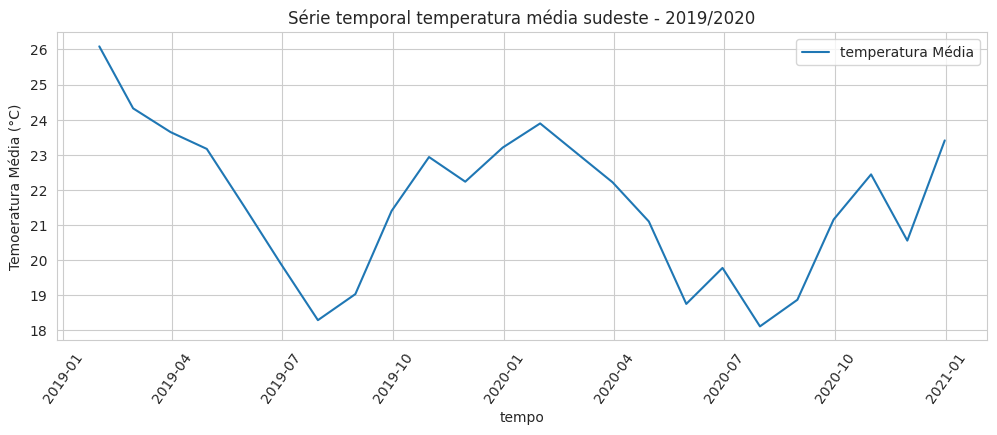

In [51]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x=resampled.index, y='temp-media',label='temperatura Média')
  grafico.set_title('Série temporal temperatura média sudeste - 2019/2020')
  grafico.set_xlabel('tempo')
  grafico.set_ylabel('Temoeratura Média (°C)')
  grafico.tick_params(axis='x', rotation=55)
  grafico.figure.set_size_inches(12,4)
  grafico.grid(True)


 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

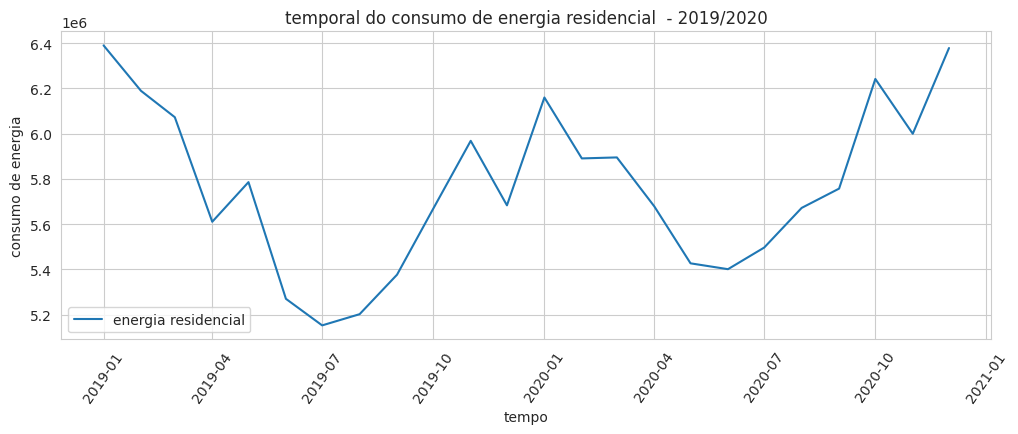

In [56]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_ano, x=energia_ano.index, y='residencial' ,label='Energia residencial')
  grafico.set_title('temporal do consumo de energia residencial  - 2019/2020')
  grafico.set_xlabel('tempo')
  grafico.set_ylabel('consumo de energia')
  grafico.tick_params(axis='x', rotation=55)
  grafico.figure.set_size_inches(12,4)
  grafico.grid(True)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [62]:
# resposta da questão 3.1.c

corr = np.corrcoef(resampled['temp-media'], energia_ano['residencial'])[0, 1]
print(f"O coeficiente da temperatura média e o consumo de energia residencial é: {corr:.2f}")

O coeficiente da temperatura média e o consumo de energia residencial é: 0.79


In [ ]:
'''with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_ano, x=energia_ano.index, y='residencial' , markers='1',label='Consumo Residencial')
  grafico = sns.lineplot(data=resampled, x=resampled.index, y='temp-media', markers='1', label='Temperatura')
  grafico.set_title('Série temporal temperatura média sudeste - 2019/2020')
  grafico.set_xlabel('tempo')
  grafico.set_ylabel('Temoeratura Média (°C)')
  grafico.figure.set_size_inches(12,4)
  grafico.tick_params(axis='x', rotation=55)
  grafico.grid(True)
  grafico.legend()
'''

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** O coeficiente de correlação é positivo, indicando uma relação linear positiva entre temperatura e consumo residencial de energia elétrica.
Porem outros fatores podem ter maior influencia.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

In [63]:
corr = np.corrcoef(resampled['temp-media'], energia_ano['comercial'])[0, 1]
print(f"O coeficiente da temperatura média e o consumo de energia comercial é: {corr:.2f}")

O coeficiente da temperatura média e o consumo de energia comercial é: 0.85



**Resposta:** O coeficiente de correlação é positivo, indicando uma relação linear positiva entre temperatura e consumo Comericial de energia elétrica.
uma correlação bem mais forte.

Acredito que temperatura nesse caso tenha um maior influencia.


### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

In [64]:
corr = np.corrcoef(resampled['temp-media'], energia_ano['industrial'])[0, 1]
print(f"O coeficiente da temperatura média e o consumo de energia industrial é: {corr:.2f}")

O coeficiente da temperatura média e o consumo de energia industrial é: 0.24


**Resposta:** O coeficiente de correlação não é positivo, indicando uma relação linear fraca.


---